In [1]:
import gabor_pyramid
import pvc1_loader
import separable_net
import torch
import os

from torch import nn
from torchvision import transforms

data_root = '.'

trainset = pvc1_loader.PVC1(os.path.join(data_root, 'crcns-ringach-data'), 
                            split='train', 
                            nt=32, 
                            ntau=9,
                            nframedelay=0)
trainloader = torch.utils.data.DataLoader(trainset, 
                                          batch_size=1, 
                                          shuffle=False)

device = torch.device('cuda')

subnet = nn.Sequential(
    gabor_pyramid.GaborPyramid(5),
    transforms.Normalize(2.2, 2.2)
)
subnet.to(device=device)

non-movie dataset, skipping .\crcns-ringach-data\neurodata\ac1\ac1_u004_001.mat, 0
non-movie dataset, skipping .\crcns-ringach-data\neurodata\ac1\ac1_u004_001.mat, 1
non-movie dataset, skipping .\crcns-ringach-data\neurodata\ac1\ac1_u004_001.mat, 2
non-movie dataset, skipping .\crcns-ringach-data\neurodata\ac1\ac1_u004_001.mat, 3
non-movie dataset, skipping .\crcns-ringach-data\neurodata\ac1\ac1_u004_001.mat, 4
non-movie dataset, skipping .\crcns-ringach-data\neurodata\ac1\ac1_u004_001.mat, 5
non-movie dataset, skipping .\crcns-ringach-data\neurodata\ac1\ac1_u004_001.mat, 6
non-movie dataset, skipping .\crcns-ringach-data\neurodata\ac1\ac1_u004_001.mat, 7
non-movie dataset, skipping .\crcns-ringach-data\neurodata\ac1\ac1_u004_001.mat, 8
non-movie dataset, skipping .\crcns-ringach-data\neurodata\ac1\ac1_u004_001.mat, 9
non-movie dataset, skipping .\crcns-ringach-data\neurodata\ac1\ac1_u004_001.mat, 10
non-movie dataset, skipping .\crcns-ringach-data\neurodata\ac1\ac1_u004_001.mat, 11


Sequential(
  (0): GaborPyramid()
  (1): Normalize(mean=2.2, std=2.2)
)

In [2]:
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import animation

def get_anim(result, norm=False):
    fig = plt.figure(figsize=(4, 4))
    ax = plt.gca()
    im = plt.imshow([[1]])
    plt.axis('off')

    rg = None
    if norm:
        rg = [result.min(), result.max()]

    def drawframe(n):
        if n >= nt:
            n = nt - 1
        else:
            im.set_data(result[:, n, :, :].transpose((1, 2, 0)))
        if norm:
            im.set_clim(rg)
        return (im)

    # blit=True re-draws only the parts that have changed.
    nt = result.shape[1]
    anim = animation.FuncAnimation(fig, drawframe, frames=nt*2, interval=100, blit=False)
    plt.close()
    return anim

clip = torch.tensor(trainset[0][0], device=device)
clip.shape

# Show the video clip
HTML(get_anim(trainset[0][0] / 2.0 + .5).to_html5_video())

In [3]:
totals = 0
n = 0
for i, data in enumerate(trainloader, 0):
    X, rg, labels = data
    X, rg, labels = X.to(device), rg.to(device), labels.to(device)

    front_dims = (X.shape[0], X.shape[2])
    X = X.permute(0, 2, 1, 3, 4).reshape(-1, X.shape[1], X.shape[3], X.shape[4])
    
    fwd = subnet.forward(X)
    break

c:\users\zanta\anaconda3\envs\py3\lib\site-packages\torch\nn\functional.py:3060: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn("Default upsampling behavior when mode={} is changed "


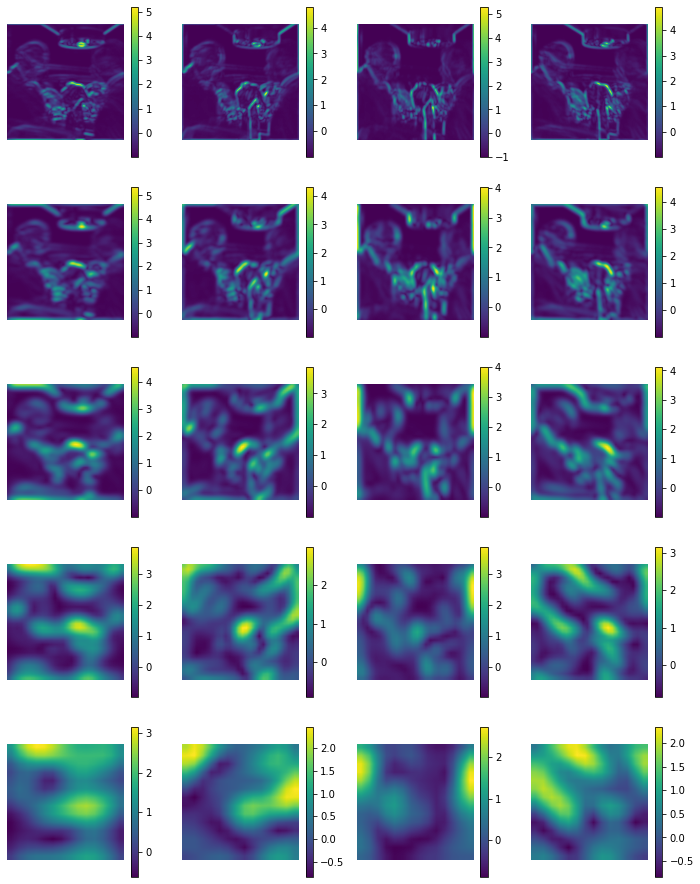

In [4]:
plt.figure(figsize=(12, 16))
m = fwd.mean(0)
for i in range(20):
    plt.subplot(5, 4, i + 1)
    plt.imshow(m[i, :, :].cpu())
    plt.axis('off')
    plt.colorbar()

In [5]:
net = separable_net.LowRankNet(subnet, 
                               trainset.total_electrodes, 
                               20, 
                               224, 
                               224, 
                               trainset.ntau).to(device)

net.to(device=device)
net.load_state_dict(torch.load('models/pyramid/xception.ckpt8031-2020-12-13 03-04-47.174810.pt'))

<All keys matched successfully>

In [6]:
net.wc.shape

torch.Size([20, 143])

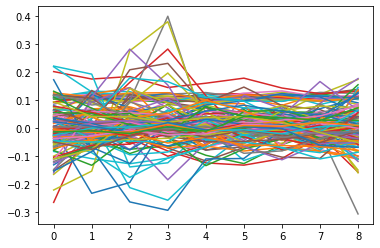

In [7]:
wt = net.wt.cpu().detach().numpy()
_ = plt.plot(wt)

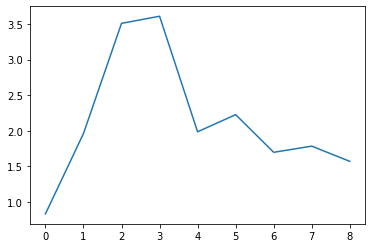

In [8]:
plt.plot(wt.sum(axis=1))

Text(0.5, 0, 'Time (frames)')

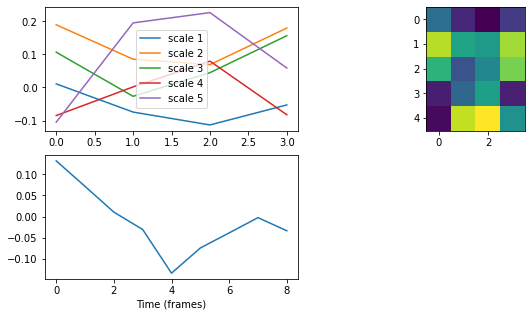

In [9]:
idx = 102

Wc = net.wc.cpu().detach().numpy().squeeze()
Wt = net.wt.cpu().detach().numpy().squeeze()

plt.figure(figsize=(10, 5))
plt.subplot(221)
plt.plot(Wc[:, idx].reshape((-1, 4)).T)
plt.legend(('scale 1', 'scale 2', 'scale 3', 'scale 4', 'scale 5'))
#Wc.shape
#Wc[:, 100].reshape((-1, 4)).shape
plt.subplot(222)
plt.imshow(Wc[:, idx].reshape((-1, 4)))

plt.subplot(223)
plt.plot(Wt[:, idx])
plt.xlabel('Time (frames)')

#plt.suptitle(f'val R^2, {r2[idx]}')

In [10]:
testset = pvc1_loader.PVC1(os.path.join(data_root, 'crcns-ringach-data'), 
                            split='train', 
                            nt=32, 
                            ntau=9,
                            nframedelay=0)
testloader = torch.utils.data.DataLoader(testset, 
                                         batch_size=16, 
                                         shuffle=False,
                                         pin_memory=True)

non-movie dataset, skipping .\crcns-ringach-data\neurodata\ac1\ac1_u004_001.mat, 0
non-movie dataset, skipping .\crcns-ringach-data\neurodata\ac1\ac1_u004_001.mat, 1
non-movie dataset, skipping .\crcns-ringach-data\neurodata\ac1\ac1_u004_001.mat, 2
non-movie dataset, skipping .\crcns-ringach-data\neurodata\ac1\ac1_u004_001.mat, 3
non-movie dataset, skipping .\crcns-ringach-data\neurodata\ac1\ac1_u004_001.mat, 4
non-movie dataset, skipping .\crcns-ringach-data\neurodata\ac1\ac1_u004_001.mat, 5
non-movie dataset, skipping .\crcns-ringach-data\neurodata\ac1\ac1_u004_001.mat, 6
non-movie dataset, skipping .\crcns-ringach-data\neurodata\ac1\ac1_u004_001.mat, 7
non-movie dataset, skipping .\crcns-ringach-data\neurodata\ac1\ac1_u004_001.mat, 8
non-movie dataset, skipping .\crcns-ringach-data\neurodata\ac1\ac1_u004_001.mat, 9
non-movie dataset, skipping .\crcns-ringach-data\neurodata\ac1\ac1_u004_001.mat, 10
non-movie dataset, skipping .\crcns-ringach-data\neurodata\ac1\ac1_u004_001.mat, 11


In [ ]:
totals = 0
n = 0

n = torch.zeros(trainset.total_electrodes, device=device)
total_labels = torch.zeros_like(n)
total_labels_squared = torch.zeros_like(n)
total_labels_sse = torch.zeros_like(n)

with torch.no_grad():
    for i, data in enumerate(testloader, 0):
        print(f"Loading batch {i}")
        X, M, labels = data
        X, M, labels = X.to(device), M.to(device), labels.to(device)

        fwd = net.forward((X, M))
        
        rg = M.any(axis=0)
        labels = labels[:, rg, :]

        n += M.sum(axis=0)

        total_labels[rg] += labels.sum(0).sum(1)
        total_labels_squared[rg] += (labels ** 2).sum(0).sum(1)
        total_labels_sse[rg] += ((labels - fwd) ** 2).sum(0).sum(1)

Loading batch 0


c:\users\zanta\anaconda3\envs\py3\lib\site-packages\torch\nn\functional.py:3060: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn("Default upsampling behavior when mode={} is changed "


Loading batch 1
Loading batch 2
Loading batch 3
Loading batch 4
Loading batch 5
Loading batch 6
Loading batch 7
Loading batch 8
Loading batch 9
Loading batch 10
Loading batch 11
Loading batch 12
Loading batch 13
Loading batch 14
Loading batch 15
Loading batch 16
Loading batch 17
Loading batch 18
Loading batch 19
Loading batch 20
Loading batch 21
Loading batch 22
Loading batch 23
Loading batch 24
Loading batch 25
Loading batch 26
Loading batch 27
Loading batch 28
Loading batch 29
Loading batch 30
Loading batch 31
Loading batch 32
Loading batch 33
Loading batch 34
Loading batch 35
Loading batch 36
Loading batch 37
Loading batch 38
Loading batch 39
Loading batch 40
Loading batch 41
Loading batch 42
Loading batch 43
Loading batch 44
Loading batch 45
Loading batch 46
Loading batch 47
Loading batch 48
Loading batch 49
Loading batch 50
Loading batch 51
Loading batch 52
Loading batch 53
Loading batch 54
Loading batch 55
Loading batch 56
Loading batch 57
Loading batch 58
Loading batch 59
Loadin

In [ ]:
import wandb

wandb.init(project="crcns-test", config={
    "learning_rate": 0.01,
    "architecture": "pyramid-2d",
})
config = wandb.config
wandb.log({"valr2": r2})

i

In [ ]:
variance_baseline = total_labels_squared / n - (total_labels / n / 18) ** 2
variance_baseline

variance_after = total_labels_sse / n

r2 = 1 - variance_after / variance_baseline
plt.hist(r2.cpu().squeeze().numpy(), 25)
plt.xlabel('Validation R2')
plt.title('Pyramid model without space')

In [ ]:
plt.plot(r2.cpu())